# Data scraping functions

In [1]:
#!pip install TwitterSearch
from TwitterSearch import *
import time
import datetime
import json
import pandas as pd
from pandas import *
import os
import os.path
import re
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import emoji
import regex

# Ensure that we can see full tweets
pd.set_option('max_colwidth', 350)

In [2]:
def scrapeTweets (jsonFile, ORkeyword_list, AND_word_list = None,geocode = None, startDate = None, endDate = None):
    try:
        
        ts = TwitterSearch(
            consumer_key = 'bQsdYC4VOaQEYzJc0GlS5Kjox',
            consumer_secret = 'sa3S0K38teo6XYZYitM7nW5fcvh8A64O36zYBD4gJ7Woxqr6ku',
            access_token = '1190054573764820993-9BSNn5ix5WkdoSdHitZcdSxCqZJLIi',
            access_token_secret = 'noOLWmmarQTCBcJnt668pNmRhcfJfQmtIRtSj7V2NbzrG'
         )

        
        tso = TwitterSearchOrder()
        tso.set_count(100)
        tso.set_language('en')                               # Set the language 
        tso.set_keywords(ORkeyword_list, or_operator = True)
        
        if(AND_word_list):
            tso.add_keyword(AND_word_list)
        
        if(geocode):
            lat = geocode[0]
            long = geocode[1]
            radius = geocode[2]
            tso.set_geocode(lat, long, radius, imperial_metric=True)
    
        if(startDate):
            tso.set_since(datetime.date(startDate))
        
        if(endDate):
            tso.set_until(datetime.date(endDate))

        
        if os.path.isfile(jsonFile) == False:
            firstwrite = open(jsonFile, 'w')
            firstwrite.write("[")
            firstwrite.close()
        
        f = open(jsonFile, 'a') #opening the file     
        for tweet in ts.search_tweets_iterable(tso): #, callback=my_callback_closure):
#             print(tweet)
            json.dump(tweet, f)
            f.write(",")
        f.seek(0, os.SEEK_END)
        f.seek(f.tell() - 1, os.SEEK_SET)
        f.truncate()
        
        f.close()

    except TwitterSearchException as e:
        print(e)

In [3]:
def cleaning(text):

    import string
    exclude = set(string.punctuation)

    import re
    # remove new line and digits with regular expression
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\d', '', text)
    # remove patterns matching url format
    url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
    text = re.sub(url_pattern, ' ', text)
    # standardize white space
    text = re.sub(r'\s+', ' ', text)
    #remove white space
    text = text.strip()

    return text

In [4]:
#Tweet information : Returns a Dataframe 

def parse_tweets(all_tweets):
    #General information regarding each tweet.
    tweetid =  [tweet['id'] for tweet in all_tweets]
    time = [pd.to_datetime(tweet['created_at']) for tweet in all_tweets]
    text = [tweet['text'] if 'text' in tweet else tweet['full_text'] for tweet in all_tweets]
    Hashtags = [tweet['entities']['hashtags'] for tweet in all_tweets]
    source= [tweet['source'] for tweet in all_tweets]
    retweet_count = [tweet['retweet_count'] for tweet in all_tweets]
    favorite_count = [tweet['favorite_count'] for tweet in all_tweets]
    
    #User profile information
    User_allinfo = [tweet['user'] for tweet in all_tweets]

    Username = [tweet['user']['name'] for tweet in all_tweets]
    Screen_name = [tweet['user']['screen_name'] for tweet in all_tweets]

    User_location = [tweet['user']['location'] for tweet in all_tweets]
    followers_count = [tweet['user']['followers_count'] for tweet in all_tweets]
    friends_count = [tweet['user']['friends_count'] for tweet in all_tweets]
    
    Geo_enabled = [tweet['user']['geo_enabled'] for tweet in all_tweets]

    #Tweet location : place 
    Geo = [tweet['geo'] for tweet in all_tweets]
    Coordinates = [tweet['coordinates'] for tweet in all_tweets]
    Place = [tweet['place'] for tweet in all_tweets]
    

    TravelTweets = pd.DataFrame({'Time':time,'source':source,'Username':Username,'Screen_name':Screen_name,'User_location':User_location,'Text':text,'Hashtags':Hashtags,'Geo_enabled':Geo_enabled,'Geo':Geo,'Coordinates':Coordinates,'Place':Place,'retweet_count':retweet_count,'followers_count':followers_count,'friends_count':friends_count,'tweet_favourite_count':favorite_count,'User_allinfo':User_allinfo}, index=tweetid) #.sort_index(ascending=True)
    
    cleaner = lambda x: cleaning(x)
    TravelTweets['Text'] = TravelTweets['Text'].apply(cleaner)
    # Replace and remove empty rows
    TravelTweets['Text'] = TravelTweets['Text'].replace('', np.nan)
#     TravelTweets = TravelTweets.dropna(how='any')
    
    #return TravelTweets[:1000]
    return TravelTweets

In [5]:
#Reading all the tweets from the json file.

def extractFromJson(filename) :
    with open(filename,"r") as read_file:
        all_tweets = json.load(read_file)
        return all_tweets

In [6]:
def addlastbraq():
#     path = ".//Desktop//Courses//202//Project//new_tweets"
#     file = os.listdir(path)
    
    for file in os.listdir(os.getcwd()): 
        if file.endswith(".json"):  #Check if the file name matches the 'prefix' pattern.
            f = open(file,'a')    #remove the comment to run it
            f.write("]")
            f.close()
    
# addlastbraq()  #remove the comment to run it 

# os.getcwd()

In [7]:
### Remove the final ']'  from the end of the json
#### Only use when need be.

def removelastbraq():
#     path = "./Desktop/Documents/MIMS-1/INFO202"
#     file = os.listdir(path)
    
    for file in os.listdir(os.getcwd()): 
        if file.endswith(".json"):  #Check if the file name matches the 'prefix' pattern.
#             f = open(file,'a')    #remove the comment to run it 
            f.seek(0, os.SEEK_END)
            f.seek(f.tell() - 1, os.SEEK_SET)
            f.truncate()
        
            f.close()
    
    
# removelastbraq() #remove the comment to run it 

# os.getcwd()

# Scraping data

In [8]:
import os

### Scraping with location only

In [9]:
# scrapeTweets("pyramids.json", [], [], [29.9792, 31.1342, 2])
# scrapeTweets("colosseum.json", [], [], [41.8902, 12.4922, 2])    
# scrapeTweets("eiffel.json", [], [], [48.8584, 2.2945, 2])

In [10]:
# scrapeTweets("tablemt.json", [], [], [-33.918861, 18.4233, 2])
# scrapeTweets("machu.json", [], [], [-13.163068, -72.545128, 2])
# scrapeTweets("statueliberty.json", [], [], [40.6892, -74.0445, 2])


In [11]:
# scrapeTweets("angkor.json", [], [], [13.4125, 103.867, 2])
# scrapeTweets("hiroshima.json", [], [], [34.3955, 132.4512, 2])
# scrapeTweets("mlk.json", [], [], [38.8862, -77.044234, 2])
# scrapeTweets("victoriafalls.json", [], [], [-17.924444, 25.8572, 2])

In [12]:
# #Just by Geocode.

# # for i in range(0,3):
# #   #Destination: Sagrada Família church
# # scrapeTweets("Barca_geocode.json", ['*'],[],[41.40,2.17,2])

# #   #Destination: 9/11 Memorial
# scrapeTweets("911_memorial_geocode.json", ['*'],[],[40.7115,-74.012725,2])

# #   #Destination: Burj Khalifa 
# scrapeTweets("Burj_khalifa_geocode.json", ['*'],[],[25.1972,55.2744,2])

# #     #Destination: Auschwitz-Birkenau State Museum, Poland
# scrapeTweets("Poland_geocode.json", ['*'],[],[50.0348,19.1737,2])

# #     #Destination : Sydney Opera House
# scrapeTweets("Sydney_Opera_geocode.json", ['*'],[],[-33.856159,151.215256,2])

# #     #Destination : Taj Mahal
# scrapeTweets("Taj_mahal_geocode.json", ['*'],[],[27.1751,78.0421,2])

# #     #Destination : Old Havana
# scrapeTweets("Havana_geocode.json", ['*'],[],[23.1344,-82.3533,2])

# #     #Destination : Golden Gate Bridge
# scrapeTweets("Golden_Gate_geocode.json", ['*'],[],[37.8199,-122.4783,2])

# #     #Destination : Saint Basil's Cathedral, Russia
# scrapeTweets("Saint_Basil_geocode.json", ['*'],[],[55.7525,37.6231,2])

# #     #Destination : Yellowstone National Park
# scrapeTweets("YellowStone_geocode.json", ['*'],[],[44.428,-110.5885,2])


In [13]:
#add last bracket
# addlastbraq()  #remove the comment to run it 


In [14]:
#Reads a json file and loads it in a list.
mlk_tweets = extractFromJson("mlk.json")
hiroshima_tweets = extractFromJson("hiroshima.json")
angkor_tweets = extractFromJson("angkor.json")
victoriafalls_tweets = extractFromJson("victoriafalls.json")
statueliberty_tweets = extractFromJson("statueliberty.json")
machu_tweets = extractFromJson("machu.json")
tablemt_tweets = extractFromJson("tablemt.json")
eiffel_tweets = extractFromJson("eiffel.json")
colosseum_tweets = extractFromJson("colosseum.json")
pyramids_tweets = extractFromJson("pyramids.json")

Barcelona_Tweet_geocode = extractFromJson("Barca_geocode.json")
NYC_memorial_tweets_geocode = extractFromJson("911_memorial_geocode.json")
Burj_khalifa_tweets_geocode = extractFromJson("Burj_khalifa_geocode.json")
Poland_tweets_geocode = extractFromJson("Poland_geocode.json")
Sydney_Opera_tweets_geocode = extractFromJson("Sydney_Opera_geocode.json")
Taj_mahal_tweets_geocode = extractFromJson("Taj_mahal_geocode.json")
Havana_tweets_geocode = extractFromJson("Havana_geocode.json")
Golden_Gate_tweets_geocode = extractFromJson("Golden_Gate_geocode.json")
Saint_Basil_tweets_geocode = extractFromJson("Saint_Basil_geocode.json")
YellowStone_tweets_geocode = extractFromJson("YellowStone_geocode.json")


In [15]:
# takes the content and returns a dateframe of relevant columns.
MLKTweets1 = parse_tweets(mlk_tweets)
HiroshimaTweets1 = parse_tweets(hiroshima_tweets)
AngkorTweets1 = parse_tweets(angkor_tweets)
VictoriaTweets1 = parse_tweets(victoriafalls_tweets)
StatueLibertyTweets1 = parse_tweets(statueliberty_tweets)
MachuTweets1 = parse_tweets(machu_tweets)
TableMtTweets1 = parse_tweets(tablemt_tweets)
EiffelTweets1 = parse_tweets(eiffel_tweets)
ColosseumTweets1 = parse_tweets(colosseum_tweets)
PyramidsTweets1 = parse_tweets(pyramids_tweets)


In [16]:
Barcelona_Tweet_geocode = parse_tweets(Barcelona_Tweet_geocode)
Barcelona_Tweet_geocode['Loc_key'] = 'Location'
NYC_memorial_tweets_geocode = parse_tweets(NYC_memorial_tweets_geocode)
NYC_memorial_tweets_geocode['Loc_key'] = 'Location'
Burj_khalifa_tweets_geocode = parse_tweets(Burj_khalifa_tweets_geocode)
Burj_khalifa_tweets_geocode['Loc_key'] = 'Location'
Poland_tweets_geocode = parse_tweets(Poland_tweets_geocode)
Poland_tweets_geocode['Loc_key'] = 'Location'
Sydney_Opera_tweets_geocode = parse_tweets(Sydney_Opera_tweets_geocode)
Sydney_Opera_tweets_geocode['Loc_key'] = 'Location'
Taj_mahal_tweets_geocode = parse_tweets(Taj_mahal_tweets_geocode)
Taj_mahal_tweets_geocode['Loc_key'] = 'Location'
Havana_tweets_geocode = parse_tweets(Havana_tweets_geocode)
Havana_tweets_geocode['Loc_key'] = 'Location'
Golden_Gate_tweets_geocode = parse_tweets(Golden_Gate_tweets_geocode)
Golden_Gate_tweets_geocode['Loc_key'] = 'Location'
Saint_Basil_tweets_geocode = parse_tweets(Saint_Basil_tweets_geocode)
Saint_Basil_tweets_geocode['Loc_key'] = 'Location'
YellowStone_tweets_geocode = parse_tweets(YellowStone_tweets_geocode)
YellowStone_tweets_geocode['Loc_key'] = 'Location'

In [17]:
citylist = [EiffelTweets1, PyramidsTweets1, ColosseumTweets1, MachuTweets1, StatueLibertyTweets1, 
            AngkorTweets1, HiroshimaTweets1, MLKTweets1, VictoriaTweets1, TableMtTweets1]

for i in citylist:
    print(len(i))

86
175
98
31
75
23
85
76
30
197


In [18]:
for destination in citylist:
    destination['Loc_key'] = "Location"

### Scraping with keyword only

In [19]:
# scrapeTweets("pyramids2.json", ["Great pyramids", "Giza pyramids", "pyramids of giza"], [], [])
# scrapeTweets("colosseum2.json", ["Colosseum", "Flavian Amphitheatre", "Coliseum"], ["Rome"], [])    
# scrapeTweets("eiffel2.json", ["Eiffel tower", "Eiffel"], [], [])

In [20]:
# scrapeTweets("tablemt2.json", ["Table mt", "Table mountain"], [], [])
# scrapeTweets("machu2.json", ["Machu Picchu", "Macchu Pichu", "Machu Pichu", "Macchu Picchu"], [], [])
# scrapeTweets("statueliberty2.json", ["Statue of Liberty", "Lady Liberty", "Lady in the Harbor", "Torch Girl", "Mother of Exiles"], [], [])

In [21]:
# scrapeTweets("angkor2.json", ["Angkor Wat", "Angkor Temple"], [], [])
# scrapeTweets("hiroshima2.json", ["Hiroshima Peace Memorial", "Genbaku Dome", "Hiroshima Prefectural Industrial Promotion Hall", "Atomic Bomb Dome", "A-Bomb Dome"], [], [])
# scrapeTweets("mlk2.json", ["MLK Memorial", "Martin Luther King Jr. Memorial", "Martin Luther King Memorial", "Martin Luther King Jr Memorial"], [], [])
# scrapeTweets("victoriafalls2.json", ["Victoria Falls", "Mosi-oa-Tunya", "Victoria Waterfall"], [], [])

In [22]:
#By kerwords only

# for i in range(0,3):
#   #Destination: Sagrada Família church
# scrapeTweets("Barca_keyword.json", ['Sagrada Família church'],['barcelona'],[])

#   #Destination: 9/11 Memorial
# scrapeTweets("911_memorial_keyword.json", ['9/11 Memorial Museum'],[],[])

# #   #Destination: Burj Khalifa 
# scrapeTweets("Burj_khalifa_keyword.json", ['burj khalifa'],[],[])

# #     #Destination: Auschwitz-Birkenau State Museum, Poland 'auschwitz', 'birkenau', 'nazi','concentration', 'camp','auswitz','auswich', 'jewish',
# scrapeTweets("Poland_keyword.json", ['Auschwitz-Birkenau State Museum'],[],[])

# #     #Destination : Sydney Opera House , 'opera', 'mystical'
# scrapeTweets("Sydney_Opera_keyword.json", ['Sydney opera'],[],[])

# #     #Destination : Taj Mahal , 'mahal', 'marble','maosoleum', 'jahan','agra', 'emperor'
# scrapeTweets("Taj_mahal_keyword.json", ['taj mahal'],['agra'],[])

# #     #Destination : Old Havana
# scrapeTweets("Havana_keyword.json", ['old havana', 'habana','havana'],[],[])

# #     #Destination : Golden Gate Bridge 'SF', 'San Fran', 'Bridge','bay area', 'san francisco','bay'
# scrapeTweets("Golden_Gate_keyword.json", ['Golden Gate Bridge', 'SF bridge'],[],[])

# #     #Destination : Saint Basil's Cathedral, Russia 'moscow', 'cathedral', 'red square','church'
# scrapeTweets("Saint_Basil_keyword.json", ['st basil\'s cathedral', 'saint basil\'s cathedral'],[],[])

# #     #Destination : Yellowstone National Park  ,'habitat', 'nature','old', 'faithful', 'landscape','wyoming'
# scrapeTweets("YellowStone_keyword.json", ['yellow stone'],['national', 'park'],[])


In [23]:
#add last bracket
# addlastbraq()  #remove the comment to run it 

In [24]:
#Reads a json file and loads it in a list.
mlk_tweets2 = extractFromJson("mlk2.json")
hiroshima_tweets2 = extractFromJson("hiroshima2.json")
angkor_tweets2 = extractFromJson("angkor2.json")
victoriafalls_tweets2 = extractFromJson("victoriafalls2.json")
statueliberty_tweets2 = extractFromJson("statueliberty2.json")
machu_tweets2 = extractFromJson("machu2.json")
tablemt_tweets2 = extractFromJson("tablemt2.json")
eiffel_tweets2 = extractFromJson("eiffel2.json")
colosseum_tweets2 = extractFromJson("colosseum2.json")
pyramids_tweets2 = extractFromJson("pyramids2.json")

Barcelona_Tweet_keyword = extractFromJson("Barca_keyword.json")
NYC_memorial_tweets_keyword = extractFromJson("911_memorial_keyword.json")
Burj_khalifa_tweets_keyword = extractFromJson("Burj_khalifa_keyword.json")
Poland_tweets_keyword = extractFromJson("Poland_keyword.json")
Sydney_Opera_tweets_keyword = extractFromJson("Sydney_Opera_keyword.json")
Taj_mahal_tweets_keyword = extractFromJson("Taj_mahal_keyword.json")
Havana_tweets_keyword = extractFromJson("Havana_keyword.json")
Golden_Gate_tweets_keyword = extractFromJson("Golden_Gate_keyword.json")
Saint_Basil_tweets_keyword = extractFromJson("Saint_Basil_keyword.json")
YellowStone_tweets_keyword = extractFromJson("YellowStone_keyword.json")

In [25]:
# takes the content and returns a dateframe of relevant columns.
MLKTweets2 = parse_tweets(mlk_tweets2)
HiroshimaTweets2 = parse_tweets(hiroshima_tweets2)
AngkorTweets2 = parse_tweets(angkor_tweets2)
VictoriaTweets2 = parse_tweets(victoriafalls_tweets2)
StatueLibertyTweets2 = parse_tweets(statueliberty_tweets2)
MachuTweets2 = parse_tweets(machu_tweets2)
TableMtTweets2 = parse_tweets(tablemt_tweets2)
EiffelTweets2 = parse_tweets(eiffel_tweets2)
ColosseumTweets2 = parse_tweets(colosseum_tweets2)
PyramidsTweets2 = parse_tweets(pyramids_tweets2)

In [26]:
Barcelona_Tweet_keyword = parse_tweets(Barcelona_Tweet_keyword)
Barcelona_Tweet_keyword['Loc_key'] = 'Keyword'
NYC_memorial_tweets_keyword = parse_tweets(NYC_memorial_tweets_keyword)
NYC_memorial_tweets_keyword['Loc_key'] = 'Keyword'
Burj_khalifa_tweets_keyword = parse_tweets(Burj_khalifa_tweets_keyword)
Burj_khalifa_tweets_keyword['Loc_key'] = 'Keyword'
Poland_tweets_keyword = parse_tweets(Poland_tweets_keyword)
Poland_tweets_keyword['Loc_key'] = 'Keyword'
Sydney_Opera_tweets_keyword = parse_tweets(Sydney_Opera_tweets_keyword)
Sydney_Opera_tweets_keyword['Loc_key'] = 'Keyword'
Taj_mahal_tweets_keyword = parse_tweets(Taj_mahal_tweets_keyword)
Taj_mahal_tweets_keyword['Loc_key'] = 'Keyword'
Havana_tweets_keyword = parse_tweets(Havana_tweets_keyword)
Havana_tweets_keyword['Loc_key'] = 'Keyword'
Golden_Gate_tweets_keyword = parse_tweets(Golden_Gate_tweets_keyword)
Golden_Gate_tweets_keyword['Loc_key'] = 'Keyword'
Saint_Basil_tweets_keyword = parse_tweets(Saint_Basil_tweets_keyword)
Saint_Basil_tweets_keyword['Loc_key'] = 'Keyword'
YellowStone_tweets_keyword = parse_tweets(YellowStone_tweets_keyword)
YellowStone_tweets_geocode['Loc_key'] = 'Keyword'


In [27]:
citylist2 = [EiffelTweets2, PyramidsTweets2, ColosseumTweets2, MachuTweets2, StatueLibertyTweets2, 
            AngkorTweets2, HiroshimaTweets2, MLKTweets2, VictoriaTweets2, TableMtTweets2]

for i in citylist2:
    print(len(i))

288
1003
1430
1309
14600
890
35
79
3199
1673


In [28]:
for destination in citylist2:
    destination['Loc_key'] = "Keyword"

### Combine location data with keyword data

In [29]:
EiffelTweets = pd.concat([EiffelTweets1, EiffelTweets2])
PyramidsTweets = pd.concat([PyramidsTweets1, PyramidsTweets2])
ColosseumTweets = pd.concat([ColosseumTweets1, ColosseumTweets2])
MachuTweets = pd.concat([MachuTweets1, MachuTweets2])
StatueLibertyTweets = pd.concat([StatueLibertyTweets1, StatueLibertyTweets2])
AngkorTweets = pd.concat([AngkorTweets1, AngkorTweets2])
HiroshimaTweets = pd.concat([HiroshimaTweets1, HiroshimaTweets2])
MLKTweets = pd.concat([MLKTweets1, MLKTweets2])
VictoriaTweets = pd.concat([VictoriaTweets1, VictoriaTweets2])
TableMtTweets = pd.concat([TableMtTweets1, TableMtTweets2])

Barcelona_Tweets =  pd.concat([Barcelona_Tweet_geocode, Barcelona_Tweet_keyword])
NYC_memorial_tweets = pd.concat([NYC_memorial_tweets_geocode, NYC_memorial_tweets_keyword ])
Burj_khalifa_tweets = pd.concat([Burj_khalifa_tweets_geocode,Burj_khalifa_tweets_keyword ])
Poland_tweets = pd.concat([Poland_tweets_geocode, Poland_tweets_keyword ])
Sydney_Opera_tweets = pd.concat([Sydney_Opera_tweets_geocode, Sydney_Opera_tweets_keyword ])
Taj_mahal_tweets =pd.concat([Taj_mahal_tweets_geocode, Taj_mahal_tweets_keyword ])
Havana_tweets = pd.concat([Havana_tweets_geocode, Havana_tweets_keyword ])
Golden_Gate_tweets = pd.concat([Golden_Gate_tweets_geocode, Golden_Gate_tweets_keyword ])
Saint_Basil_tweets = pd.concat([Saint_Basil_tweets_geocode, Saint_Basil_tweets_keyword ])
YellowStone_tweets = pd.concat([YellowStone_tweets_geocode, YellowStone_tweets_keyword],sort = False)

In [30]:
destinationlist = [EiffelTweets, PyramidsTweets, ColosseumTweets, MachuTweets, StatueLibertyTweets, 
                   AngkorTweets, HiroshimaTweets, MLKTweets, VictoriaTweets, TableMtTweets, Barcelona_Tweets, 
                   NYC_memorial_tweets, Burj_khalifa_tweets, Poland_tweets,Sydney_Opera_tweets, Taj_mahal_tweets, 
                   Havana_tweets, Golden_Gate_tweets, Saint_Basil_tweets, YellowStone_tweets]

In [31]:

cd = EiffelTweets.apply(lambda row: row.astype(str).str.contains('EGYPT', flags=re.IGNORECASE, regex=True).any(), axis=1)
# cd

### deduplication

In [32]:
#deduplication
for destination in destinationlist:
    destination.drop_duplicates(subset="Text", keep="first", inplace=True)

In [33]:
# for i in destinationlist:
#     print(len(i))

# Creating masterlist

In [34]:
import csv

masterlist = []
with open("Keywords_Cities - Sheet2.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    for row in csv_reader:
        row[0] = row[0].strip()
        masterlist.append(row)

print(masterlist)

"""
masterlist[i][0]: Location
masterlist[i][1]: Destination name
masterlist[i][2]: Destination type
masterlist[i][3]: Latitude
masterlist[i][4]: Longitude
masterlist[i][5]: Emoji dictionary
masterlist[i][6]: Sentiment mean
"""

[['Paris, France', 'Eiffel Tower', 'Landmark', '48.8584', '2.2945'], ['Cairo, Egypt', 'Great Pyramid of Giza', 'Landmark', '29.9792', '31.1342'], ['Rome, Italy', 'Colosseum', 'Landmark', '41.8902', '12.4922'], ['Peru', 'Machu Picchu', 'Landmark', '-13.163068', '-72.545128'], ['New York, USA', 'Statue of Liberty', 'Landmark', '40.6892', '-74.0445'], ['Angkor, Cambodia', 'Angkor Wat', 'Religious', '13.4125', '103.867'], ['Hiroshima, Japan', 'Hiroshima Peace Memorial', 'Memorial', '34.3955', '132.4512'], ['Washington DC, USA', 'Martin Luther King Jr. Memorial', 'Memorial', '38.8862', '-77.044234'], ['Zambezi River, Zimbabwe and Zambia', 'Victoria Falls', 'Nature', '-17.924444', '25.8572'], ['Cape Town, South Africa', 'Table Mountain National Park', 'Nature', '-33.918861', '18.4233'], ['NYC, USA', '9/11 Memorial Museum', 'Memorial', '40.7115', '-74.012725'], ['Barcelona, Spain', 'Sagrada Família church', 'Religious', '41.403664', '2.174391'], ['Dubai, United Arab Emirates', 'Burj Khalifa',

'\nmasterlist[i][0]: Location\nmasterlist[i][1]: Destination name\nmasterlist[i][2]: Destination type\nmasterlist[i][3]: Latitude\nmasterlist[i][4]: Longitude\nmasterlist[i][5]: Emoji dictionary\nmasterlist[i][6]: Sentiment mean\n'

In [35]:
#Checking counts
for i in range(len(destinationlist)):
    print(masterlist[i][1], len(destinationlist[i]))


Eiffel Tower 320
Great Pyramid of Giza 474
Colosseum 541
Machu Picchu 809
Statue of Liberty 2677
Angkor Wat 486
Hiroshima Peace Memorial 112
Martin Luther King Jr. Memorial 110
Victoria Falls 762
Table Mountain National Park 899
9/11 Memorial Museum 182
Sagrada Família church 217
Burj Khalifa 810
Auschwitz-Birkenau State Museum, Poland 14
Sydney Opera House 312
Taj Mahal 277
Old Havana 688
Golden Gate Bridge 955
Saint Basil's Cathedral 144
Yellowstone National Park 36


# Structure of each destination dataframe

In [36]:
EiffelTweets.head()

,Time,source,Username,Screen_name,User_location,Text,Hashtags,Geo_enabled,Geo,Coordinates,Place,retweet_count,followers_count,friends_count,tweet_favourite_count,User_allinfo,Loc_key
1204906472125190145,2019-12-11 23:31:03+00:00,"<a href=""http://instagram.com"" rel=""nofollow"">Instagram</a>",Priscilla Alcalá,parevilla,Cusco - Perú,Surrounded by art! en Versailles Palace Paris,[],True,"{'type': 'Point', 'coordinates': [48.87045, 2.30184]}","{'type': 'Point', 'coordinates': [2.30184, 48.87045]}","{'id': '09f6a7707f18e0b1', 'url': 'https://api.twitter.com/1.1/geo/id/09f6a7707f18e0b1.json', 'place_type': 'city', 'name': 'Paris', 'full_name': 'Paris, France', 'country_code': 'FR', 'country': 'France', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[2.2241006, 48.8155214], [2.4699053, 48.8155214], [2.4699053, 4...",0,170,751,0,"{'id': 218518423, 'id_str': '218518423', 'name': 'Priscilla Alcalá', 'screen_name': 'parevilla', 'location': 'Cusco - Perú', 'description': 'Complicated, like everyone else.....', 'url': 'http://t.co/OBjgQVlBCb', 'entities': {'url': {'urls': [{'url': 'http://t.co/OBjgQVlBCb', 'expanded_url': 'http://www.facebook.com/Kissa310', 'display_url': 'f...",Location
1204901282047131648,2019-12-11 23:10:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Heather Newman #CMO #MVP #ESPC19 #MWCP19,heddanewman,"Los Angeles, CA",Amazing tour of Paris tonight with @slanoux #sweetfriends all over the world #burningman Thank you darling. ❤️,"[{'text': 'sweetfriends', 'indices': [44, 57]}, {'text': 'burningman', 'indices': [77, 88]}]",True,None,None,"{'id': '07d9f1a340c87002', 'url': 'https://api.twitter.com/1.1/geo/id/07d9f1a340c87002.json', 'place_type': 'poi', 'name': 'Tour Eiffel', 'full_name': 'Tour Eiffel', 'country_code': 'FR', 'country': 'France', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[2.2944259643554683, 48.858249354605626], [2.294425964355468...",0,4813,4692,0,"{'id': 18568145, 'id_str': '18568145', 'name': 'Heather Newman #CMO #MVP #ESPC19 #MWCP19', 'screen_name': 'heddanewman', 'location': 'Los Angeles, CA', 'description': 'A Creative Maven #CMO #MicrosoftMVP #Writer #Marketing #PersonalDevelopment #Brand Podcast: @Mavensdoitbetta Biz: @creativemavens @contentpanda (She/Her)', 'url': 'https://t.co/0...",Location
1204894408631619585,2019-12-11 22:43:07+00:00,"<a href=""http://instagram.com"" rel=""nofollow"">Instagram</a>",Diego Manrique,diegomanrique_q,Bogotá,A night in #Paris @ Tour Eiffel,"[{'text': 'Paris', 'indices': [11, 17]}]",True,"{'type': 'Point', 'coordinates': [48.85838631, 2.29455382]}","{'type': 'Point', 'coordinates': [2.29455382, 48.85838631]}","{'id': '09f6a7707f18e0b1', 'url': 'https://api.twitter.com/1.1/geo/id/09f6a7707f18e0b1.json', 'place_type': 'city', 'name': 'Paris', 'full_name': 'Paris, France', 'country_code': 'FR', 'country': 'France', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[2.2241006, 48.8155214], [2.4699053, 48.8155214], [2.4699053, 4...",0,104,258,0,"{'id': 57042690, 'id_str': '57042690', 'name': 'Diego Manrique', 'screen_name': 'diegomanrique_q', 'location': 'Bogotá', 'description': 'Traveler, Dreamer.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 104, 'friends_count': 258, 'listed_count': 9, 'created_at': 'Wed Jul 15 15:14:25 +0000 2009',...",Location
1204890089160986624,2019-12-11 22:25:57+00:00,"<a href=""http://instagram.com"" rel=""nofollow"">Instagram</a>",𝓑 𝒜𝓁𝓉𝒽𝒶𝓃𝒾 🖤,balthanii,"Paris, France",Take me back to the night we met..🖤 @ Tour Eiffel,[],True,"{'type': 'Point', 'coordinates': [48.85838631, 2.29455382]}","{'type': 'Point', 'coordinates': [2.29455382, 48.85838631]}","{'id': '09f6a7707f18e0b1', 'url': 'https://api.twitter.com/1.1/geo/id/09f6a7707f18e0b1.json', 'place_type': 'city', 'name': 'Paris', 'full_name': 'Paris, France', 'country_code': 'FR', 'country': 'France', 'c

### old work

In [37]:
##Attempt 1 at scraping (with geocode + keyword)

# scrapeTweets("pyramids.json", ['pyramid', 'pyramids', 'giza', 'sphinx', 'museum', 'wonder'], [], [29.9792, 31.1342, 3])
# scrapeTweets("colosseum.json", ['collosseum', 'coliseum', 'roman', 'palatine', 'battle', 'rome'], [], [41.8902, 12.4922, 2])    
# scrapeTweets("eiffel.json", ['eiffel', 'tower', 'effiel', 'tour'], [], [48.8584, 2.2945, 2])

In [38]:
# for i in range(0, 20):
#     scrapeTweets("borabora.json", ['tahiti', 'island', 'bungalow', 'polynesia', 'beach'], [], [-16.499701, -151.770538, 5])
#     scrapeTweets("machu.json", ['machu', 'picchu', 'macchu', 'pichu', 'lost', 'city', 'inca', 'incas', 'empire', 'andes', 'ruins', 'civilization'], [], [-13.163068, -72.545128, 3])
#     scrapeTweets("statueliberty.json", ['statue', 'liberty', 'lady', 'free', 'freedom', 'torch', 'ellis', 'immigration', 'immigrants'], [], [40.6892, -74.0445, 2])


In [39]:
# for i in range(0, 20):
#     scrapeTweets("angkor.json", ['angkor', 'ankor', 'wat', 'temple', 'statue', 'khmer', 'hindu', 'religious', 'vishnu', 'tower', 'ancient'], [], [13.4125, 103.867, 3])
#     scrapeTweets("hiroshima.json", ['hiroshima', 'peace', 'memorial', 'museum', 'bombing', 'healing', 'bomb', 'atomic', 'war', 'nuclear'], [], [34.3955, 132.4512, 2])
#     scrapeTweets("mlk.json", ['mlk', 'martin', 'luther', 'king', 'memorial', 'activism', 'civil rights', 'african american', 'i have a dream', 'equal', 'racial'], [], [38.8862, -77.044234, 2])
#     scrapeTweets("victoriafalls.json", ['victoria', 'falls', 'waterfall', 'wonder', 'tallest', 'vic falls', 'geological', 'natural wonder'], [], [-17.924444, 25.8572, 2])

In [40]:
#adding extra tweets
# scrapeTweets("tablemt.json", ['table', 'mountain', 'national', 'park', 'nature', 'hike', 'views', 'table mt', 'landmark', 'cape fold'], [], [-33.918861, 18.4233, 3])
   

# FUNCTIONS (BACK)

# Emoji functions

In [41]:
def extract_emojis(str):
    return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

In [42]:
"""Creates a dictionary of emojis and counts for the destination: Returns dictionary"""
def emoji_dict(dataframe):
    import emoji
    listemojis = []
    
    for tweet in dataframe['Text']:
        if any(char in emoji.UNICODE_EMOJI for char in tweet):
            listemojis.append(extract_emojis(tweet))
        
    #create set of unique emojis
    uniqueemojis = set()
    
    for emojis in listemojis:
        for emoji in emojis:
            uniqueemojis.add(emoji)
            
    #create dictionary of emojis, all counts set to zero
    emojicount = {}
    for i in uniqueemojis:
        emojicount[i] = 0
        
    
    #loop through list and count emojis
    for emojis in listemojis:
        for emoji in emojis:
            emojicount[emoji] +=1
            
    return emojicount

def sorted_emojicount(emojicount):
    #takes an emoji dictionary created by emoji_dict() and returns a sorted list of tuples
    #where each tuple is (emoji, count)
    
    sorted_emojicount = sorted(emojicount.items(), key=lambda kv: kv[1], reverse=True)
    
    return(sorted_emojicount)

In [43]:
eiffelemojis = emoji_dict(EiffelTweets)
print(eiffelemojis)
print(sorted_emojicount(eiffelemojis))





{'✅': 2, '😍': 4, '😭': 5, '😤': 1, '✏': 1, '💜': 4, '🙄': 1, '\U0001f9a6': 1, '🇹': 1, '💋': 1, '⚡': 1, '😺': 1, '😡': 1, '🤭': 2, '❤': 6, '🗼': 2, '😱': 1, '🇫': 8, '💙': 1, '🏻': 2, '🙏': 2, '🖤': 2, '😢': 1, '🌃': 1, '✨': 3, '🇷': 9, '🏽': 1, '✈': 1, '😩': 1, '🐭': 1, '🐾': 1, '🤦': 1, '💀': 2, '♀': 1, '🥰': 3, '🏰': 1, '💫': 1, '😉': 1, '🥶': 1, '🌉': 1, '🤣': 5, '❄': 2, '💛': 1, '💍': 1, '😏': 2, '🏼': 1, '🍆': 1, '🖊': 1, '😘': 1, '👏': 4, '🤬': 4, '😎': 1, '😂': 8, '😥': 1}
[('🇷', 9), ('🇫', 8), ('😂', 8), ('❤', 6), ('😭', 5), ('🤣', 5), ('😍', 4), ('💜', 4), ('👏', 4), ('🤬', 4), ('✨', 3), ('🥰', 3), ('✅', 2), ('🤭', 2), ('🗼', 2), ('🏻', 2), ('🙏', 2), ('🖤', 2), ('💀', 2), ('❄', 2), ('😏', 2), ('😤', 1), ('✏', 1), ('🙄', 1), ('\U0001f9a6', 1), ('🇹', 1), ('💋', 1), ('⚡', 1), ('😺', 1), ('😡', 1), ('😱', 1), ('💙', 1), ('😢', 1), ('🌃', 1), ('🏽', 1), ('✈', 1), ('😩', 1), ('🐭', 1), ('🐾', 1), ('🤦', 1), ('♀', 1), ('🏰', 1), ('💫', 1), ('😉', 1), ('🥶', 1), ('🌉', 1), ('💛', 1), ('💍', 1), ('🏼', 1), ('🍆', 1), ('🖊', 1), ('😘', 1), ('😎', 1), ('😥', 1)]


In [44]:
# for i in eiffelemojis:
#     print(i[0])
#     print(emoji.demojize(i[0]))
    
for i in eiffelemojis:
    if emoji.demojize(i[0], use_aliases=True) == ":heart_eyes:":
        print(i)

😍


# Sentiment analysis : 

In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentences):
    compound = []
    score =  [analyser.polarity_scores(tweet) for tweet in sentences]
    for sc in score:
        compound.append(sc['compound'])
    
    return compound
#     score_compound = score['compound']
#     print("{:-<300} {}".format(tweet, str(score)))
    


In [46]:
#Getting the final (mean) sentiment score associated with each tweet. 

def Fetch_sentiment_score(df): #Takes dataframe as the input.
    compound_score = sentiment_analyzer_scores(df['Text'])  #Pass the text column of the dataframe you want to analyze.

    df['Compound_score'] = compound_score 

    #Splitting the score into ordinal categories [1,2,3,4,5] : 1,2 <- negetive | 3 <- Neutral | 5 <- Positive
    df['Score'] = pd.cut(df['Compound_score'], bins=5, labels=[1, 2, 3, 4, 5])

    #Converting the tweets sentiment into numerical values. and taking the mean for the complete set.
    df['Score'] = df['Score'].astype('int')


In [47]:
def Final_senti_score(df):
    Fetch_sentiment_score(df)
    return df['Score'].mean()

In [48]:
def toptweet_favourite(df):  
    #each tweet is assigned a rank # based on their # followers and sentiment 
    #(ex. 1 when score = 3 means that out of all the neutral tweets, they have the most followers)
    df["Top_fav_follower"]=df.groupby('Score')['followers_count'].rank("dense",ascending=False)
    
    #same but for # favorites for that tweet
    df["Top_fav_favourite"]=df.groupby('Score')['tweet_favourite_count'].rank("dense",ascending=False)

## Appending to masterlist & dataframe

In [49]:
#append emoji dictionaries
for i in range(0,20):
    emojilist = emoji_dict(destinationlist[i])    
    masterlist[i].append(emojilist)

In [50]:
#append sentiment
for i in range(0,20):
    sentiment_score = Final_senti_score(destinationlist[i])   
    masterlist[i].append(sentiment_score)

In [51]:
#append toptweet
for i in destinationlist:
    toptweet_favourite(i)

In [52]:
for i in masterlist:
    print(i[1])
    print(sorted_emojicount(i[5]))
    print(i[6])

Eiffel Tower
[('🇷', 9), ('🇫', 8), ('😂', 8), ('❤', 6), ('😭', 5), ('🤣', 5), ('😍', 4), ('💜', 4), ('👏', 4), ('🤬', 4), ('✨', 3), ('🥰', 3), ('✅', 2), ('🤭', 2), ('🗼', 2), ('🏻', 2), ('🙏', 2), ('🖤', 2), ('💀', 2), ('❄', 2), ('😏', 2), ('😤', 1), ('✏', 1), ('🙄', 1), ('\U0001f9a6', 1), ('🇹', 1), ('💋', 1), ('⚡', 1), ('😺', 1), ('😡', 1), ('😱', 1), ('💙', 1), ('😢', 1), ('🌃', 1), ('🏽', 1), ('✈', 1), ('😩', 1), ('🐭', 1), ('🐾', 1), ('🤦', 1), ('♀', 1), ('🏰', 1), ('💫', 1), ('😉', 1), ('🥶', 1), ('🌉', 1), ('💛', 1), ('💍', 1), ('🏼', 1), ('🍆', 1), ('🖊', 1), ('😘', 1), ('😎', 1), ('😥', 1)]
3.390625
Great Pyramid of Giza
[('🇪', 22), ('🇬', 22), ('♥', 13), ('❤', 8), ('🍗', 8), ('🌞', 7), ('😍', 6), ('♂', 6), ('👌', 5), ('🐪', 4), ('💙', 4), ('📷', 4), ('🤦', 4), ('😂', 4), ('💪', 3), ('⚡', 3), ('🏻', 3), ('🏅', 3), ('✨', 3), ('✈', 3), ('🐫', 3), ('✊', 3), ('🇦', 2), ('🥇', 2), ('😱', 2), ('🇫', 2), ('🖤', 2), ('💨', 2), ('🌹', 2), ('🇺', 2), ('🇨', 2), ('🇷', 2), ('🧳', 2), ('🏽', 2), ('🎉', 2), ('🌍', 2), ('®', 2), ('🇸', 2), ('😃', 2), ('😎', 2), ('

# FUNCTIONS (FRONT)

In [103]:
def top5emoji(dictionary):
    sorted_list = sorted_emojicount(dictionary)
    
    print("The top emojis used at this destination are : ")
    
    if len(sorted_list) >= 5:
        for i in range(0,5):
            print(sorted_list[i][0])
            
    elif len(sorted_list)<5:
        for i in range(len(sorted_list)):
            print(sorted_list[i][0])
    else:
        print("")

# top5emoji(masterlist[1][5])

In [104]:
for i in masterlist:
    print(top5emoji(i[5]))

The top emojis used at this destination are : 
🇷
🇫
😂
❤
😭
None
The top emojis used at this destination are : 
🇪
🇬
♥
❤
🍗
None
The top emojis used at this destination are : 
🇮
🇹
😍
❤
🎄
None
The top emojis used at this destination are : 
❤
🇪
🇵
😂
🤩
None
The top emojis used at this destination are : 
🗽
😂
🇺
🇳
🇮
None
The top emojis used at this destination are : 
🇭
🇰
😂
🏽
👏
None
The top emojis used at this destination are : 
❤
😂
‼
😉
😅
None
The top emojis used at this destination are : 
😂
🏽
👇
📅
😍
None
The top emojis used at this destination are : 
😂
😢
🚨
👉
🇿
None
The top emojis used at this destination are : 
😂
🇦
🇿
🤣
😭
None
The top emojis used at this destination are : 
⚡
✨
😍
😂
🤣
None
The top emojis used at this destination are : 
✏
❤
🖤
👉
✨
None
The top emojis used at this destination are : 
😂
😍
❤
💑
🇪
None
The top emojis used at this destination are : 
🕯
🇵
🇱
None
The top emojis used at this destination are : 
😍
🤣
❤
😭
🇦
None
The top emojis used at this destination are : 
❤
👋
👍
🇳
🇮
None
The top emoj

In [54]:
def classification_based_score(df):
    pos_word_score = pd.DataFrame({'pos_score':df.loc[df['Score'] > 3, 'Score']})
    # print(pos_word_score)

    pos_word_score['pos_score'] = pos_word_score['pos_score'].astype('int')

    print("Positive sentiment : ",pos_word_score['pos_score'].mean())
    print("Positive tweets : ",pos_word_score['pos_score'].count())


    neg_word_score = pd.DataFrame({'neg_score':df.loc[df['Score'] < 3, 'Score']})
    # print(pos_word_score)

    neg_word_score['neg_score'] = neg_word_score['neg_score'].astype('int')

    print("Negative sentiment : ",neg_word_score['neg_score'].mean())
    print("Negative tweets : ",neg_word_score['neg_score'].count())


    neu_word_score = pd.DataFrame({'neu_score':df.loc[df['Score'] == 3, 'Score']})
    # print(pos_word_score)

    neu_word_score['neu_score'] = neu_word_score['neu_score'].astype('int')

    print("Neutral sentiment : ",neu_word_score['neu_score'].mean())
    print("Neutral tweets : ",neu_word_score['neu_score'].count())

In [55]:
#driver
classification_based_score(EiffelTweets)

Positive sentiment :  4.4296875
Positive tweets :  128
Negative sentiment :  1.55
Negative tweets :  40
Neutral sentiment :  3.0
Neutral tweets :  152


In [56]:
def toptweets_positive(df):
    first=None
    second=None
    third=None
    a = df.loc[df['Loc_key'] == "Keyword"]
    b = a.loc[df['Score'] >= 4.0]
    c = df.loc[df['Loc_key'] == "Location"]
    d = c.loc[df['Score'] >= 4.0]
    try:
        first = b.loc[b['Top_fav_follower'] == 1.0, 'Text'].values[0]
        print("Top positive tweets by follower:")
        print(first)
    except:
        print("There are no positive tweets at this location.")
    try:
        second = b.loc[b['Top_fav_follower'] == 2.0, 'Text'].values[0]
        print(second)
    except:
#         print("No follower at 2")
        try:
            second = d.loc[d['Top_fav_follower'] == 1.0, 'Text'].values[0]
            print(second)
        except:
            print()
    try:
        third = b.loc[b['Top_fav_follower'] == 3.0, 'Text'].values[0]
        print(third)
    except:
#         print("No follower at 3")
        try:
            third = d.loc[d['Top_fav_follower'] == 1.0, 'Text'].values[0]
            print(third)
        except:
            print()
        

In [57]:
# toptweets_positive(EiffelTweets)

In [58]:
def toptweets_negative(df):
    first=None
    second=None
    third=None
    a = df.loc[df['Loc_key'] == "Keyword"]
    b = a.loc[df['Score'] <= 2.0]
    c = df.loc[df['Loc_key'] == "Location"]
    d = c.loc[df['Score'] <= 2.0]
    try:
        first = b.loc[b['Top_fav_follower'] == 1.0, 'Text'].values[0]
        print("Top negative tweets by follower:")
        print(first)
    except:
        print("There are no negative tweets at this location.")
    try:
        second = b.loc[b['Top_fav_follower'] == 2.0, 'Text'].values[0]
        print(second)
    except:
        try:
            second = d.loc[d['Top_fav_follower'] == 1.0, 'Text'].values[0]
            print(second)
        except:
            print()
    try:
        third = b.loc[b['Top_fav_follower'] == 3.0, 'Text'].values[0]
        print(third)
    except:
        try:
            third = d.loc[d['Top_fav_follower'] == 1.0, 'Text'].values[0]
            print(third)
        except:
            print()
        

In [59]:
# toptweets_negative(YellowStone_tweets)

# toptweets_positive(YellowStone_tweets)

In [60]:
def senti_hist_LocandKey(df):
#     plt.figure(figsize=(8, 6))
#     plt.subplot(111)
#     newdataframe = df[df['Loc_key'] == "Location"]
#     newdataframe['Score'].value_counts().plot(kind="bar")
#     plt.ylabel("Number of Tweets")
#     plt.title("Number of Tweets based on sentiment");
#     plt.legend()
    
    Loc = df[df['Loc_key'] == "Location"]
    key = df[df['Loc_key'] == "Keyword"]
    
#     Loc.plot.hist(x=key['Score'])
#     Loc["Score"].plot.hist()
    
    plt.hist([key['Score'].value_counts(), Loc['Score'].value_counts()], label=['By Keyword', 'By Location'])
    plt.ylabel("Sentiment < 1 [Neg.] --- 5 [Positive]>")
    plt.xlabel("Frequency of Tweets ");
    plt.legend(loc='upper right')
    plt.show()

In [61]:
# b = EiffelTweets[(EiffelTweets['Top_fav_follower'] == 1)]
# b[0]

# if len(b) > 0:
#     pos1 = b[0]["Text"]
#     pos2 = b[1]["Text"]
#     pos3 = b[2]["Text"]

# print(pos1)

### MAP 

In [62]:
def make_point(row):
    return Point(float(row.Long), float(row.Lat))

In [63]:
def sentiment_map():
    master_map = pd.DataFrame(masterlist)
    master_map.columns = ['Cities','Attraction','AttractionType','Lat','Long','Emoji','Sentiment']
    
    # Go through every row, and make a point out of its lat and lon
    points = master_map.apply(make_point, axis=1)

    # Make a new GeoDataFrame
    # using the data from our old df
    # but also adding in the geometry we just made
    final = gpd.GeoDataFrame(master_map, geometry=points)

    # It doesn't come with a CRS because it's a CSV, so let's
    # say "hey, let's use the standard shape of the earth etc"
    final.crs = {'init': 'epsg:4326'}
    
    #by sentiment analysis

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    # Save the first layer as ax
    ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(20,7))
    # Pass ax=ax to the second layer
    plt.title("Top 20 Global Cities by Sentiment Analysis")
    final.plot(column='Sentiment', figsize=(20,7), ax=ax, legend=True, alpha=0.5, markersize=120);
    ax.axis('off')
    plt.show()

In [64]:
# sentiment_map()

In [65]:
def attractiontype_map():
    master_map = pd.DataFrame(masterlist)
    master_map.columns = ['Cities','Attraction','AttractionType','Lat','Long','Emoji','Sentiment']
    
    # Go through every row, and make a point out of its lat and lon
    points = master_map.apply(make_point, axis=1)

    # Make a new GeoDataFrame
    # using the data from our old df
    # but also adding in the geometry we just made
    final = gpd.GeoDataFrame(master_map, geometry=points)

    # It doesn't come with a CRS because it's a CSV, so let's
    # say "hey, let's use the standard shape of the earth etc"
    final.crs = {'init': 'epsg:4326'}
    
    #by sentiment analysis

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    # Save the first layer as ax
    ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(20,7))
    # Pass ax=ax to the second layer
    plt.title("Top 20 Global Cities by Attraction Type")
    final.plot(column='AttractionType', figsize=(20,7), ax=ax, legend=True, alpha=0.5, markersize=120);
    ax.axis('off')
    plt.show()

# Histogram of time of day

In [66]:
EiffelTweets.head()
EiffelTweets.to_csv("eiffel.csv", sep=',', header=None, index=None)


In [67]:
for destination in destinationlist:
    destination['Hours'] = destination['Time'].dt.hour

In [68]:
# f = copy.plot.scatter(x='Hours', y='Score')
# f


In [69]:
# copy["Score"].plot.hist()
# # copy.plot.hist(x='Hours', y="Score")

In [70]:
#Scatter plot functions.

def scatterplot_time(df):
    
# x = copy['Hours']
    segment = df[df['Loc_key'] == "Location"]

    x = segment['Hours']
    y = segment['Score']

    area = np.pi*50

    # Plot
    # plt.scatter(x, y, s=area, c=None, alpha=0.5)
    # plt.title('Sentiment vs. Time of Day')
    # plt.xlabel('Time')
    # plt.ylabel('Sentiment')
    # plt.show()

    sns.stripplot(x="Hours", y="Score", data=segment, size=13, jitter=True)
    sns.despine()


In [71]:
rawtime = EiffelTweets['Time'].to_list()
cleantime = []

for i in range(len(rawtime)):
    a = str(rawtime[i])
    b = a.split(" ")
    c = b[1].split("+")
    d = c[0][:5]
    e = d.replace(":", ".")
    time = float(e)
    
    cleantime.append(c[0])

In [72]:
def scatterplot_time(df):
    
# x = copy['Hours']
    segment = df[df['Loc_key'] == "Location"]

    x = segment['Hours']
    y = segment['Score']

    area = np.pi*50

    # Plot
    plt.scatter(x, y, s=area, c=None, alpha=0.5)
    plt.title('Sentiment vs. Time of Day')
    plt.xlabel('Time')
    plt.ylabel('Sentiment')
    plt.show()

#     sns.stripplot(x="Hours", y="Score", data=segment, size=10, jitter=True)
#     sns.despine()

# scatterplot_time(EiffelTweets)

In [74]:
# # df = pd.DataFrame(columns=['Time', 'Sentiment Score'])
# df = pd.DataFrame(columns=['Time'])
# df['Time'] = cleantime
# df.append(copy["Score"])

# # df['Sentiment Score'] = copy["Score"]

# # df["Time"] = pd.DataFrame(cleantime)
# df.head()

In [ ]:
# sophie2 = pd.DataFrame(masterlist)
# sophie2.to_csv("sophie2.csv", sep=',', header=None, index=None)


# Appending to masterlist

In [ ]:
#turning to csv
# E.to_csv("poland.csv", sep=',', header=None, index=None)


In [ ]:
# for i in masterlist:
#     print(i[1])
#     print(sorted_emojicount(i[5]))
#     print(i[6])

In [75]:
def emoji_search(masterlist):
    import emoji
    flag = True
    while flag:
#         print("You can directly copy and paste the emoji's ")
        raw_emoji = input("Enter the emoji in text form (ex. :grinning_face:) or you could simply copy+paste it [ 😉]:")
        print("Press 'q' to quit.")
        if (raw_emoji == "q" or raw_emoji == "Q") :
            flag = False
#         raw_emoji = ":"+raw_emoji+":"
        new_emoji = emoji.emojize(raw_emoji, use_aliases=True)
#         new_emoji = raw_emoji
        emojicount = []
        for i in range(0, 20):
            emoji_dict = masterlist[i][5] #find the emoji dictionary
            if new_emoji in emoji_dict:
                emojicount.append(emoji_dict[new_emoji])
            else:
                emojicount.append(0)
        top1 = 0
        top2 = 0
        top3 = 0
        for i in range(0,20):
            if emojicount[i]>top1:
                top1 = emojicount[i]
                name1 = masterlist[i][1]
        for i in range(0,20):
            if emojicount[i]>top2 and emojicount[i]<top1:
                top2 = emojicount[i]
                name2 = masterlist[i][1]
        for i in range(0,20):
            if emojicount[i]>=top3 and emojicount[i]<top2:
                top3 = emojicount[i]
                name3 = masterlist[i][1]
        if top1 == 0 and flag == True:
            print("This emoji was not used in our dataset.")
        elif flag == True:
            print("=======================================================<>=====================================================\n \n")

            print("The top destination that uses this emoji is the " + name1 + ", where it was used " + str(top1) + " times.\n")
            if top2 != 0:
                print("The second most popular destination with this emoji is the " + name2 + ", where it was used " + str(top2) + " times.\n")
            if top3 !=0:
                print("The third most popular destination with this emoji is the " + name3 + ", where it was used " + str(top3) + " times.\n")
#     for emoji_dictionary in listdicts:
#         if new_emoji in emoji_dictionary:
#             print(emoji_dictionary[new_emoji])
#write in error message for zero

In [76]:
# emoji_search(masterlist)

# Scratch paper
testing things, notes, etc

In [77]:
import pandas as pd
df = pd.DataFrame(masterlist)
df.head()

# headers = ["Location", "Destination", "Type of Destination", "Latitude", "Longitude", "Emoji Dictionary", "Sentiment Score"] 

##make csv file
# df.to_csv("sophie.csv", sep=',', header=headers, index=None)

# masterlist[0]: Location
# masterlist[1]: Destination name
# masterlist[2]: Destination type
# masterlist[3]: Latitude
# masterlist[4]: Longitude
# masterlist[5]: Emoji dictionary
# masterlist[6]: Sentiment mean


,0,1,2,3,4,5,6
0,"Paris, France",Eiffel Tower,Landmark,48.8584,2.2945,"{'✅': 2, '😍': 4, '😭': 5, '😤': 1, '✏': 1, '💜': 4, '🙄': 1, '🦦': 1, '🇹': 1, '💋': 1, '⚡': 1, '😺': 1, '😡': 1, '🤭': 2, '❤': 6, '🗼': 2, '😱': 1, '🇫': 8, '💙': 1, '🏻': 2, '🙏': 2, '🖤': 2, '😢': 1, '🌃': 1, '✨': 3, '🇷': 9, '🏽': 1, '✈': 1, '😩': 1, '🐭': 1, '🐾': 1, '🤦': 1, '💀': 2, '♀': 1, '🥰': 3, '🏰': 1, '💫': 1, '😉': 1, '🥶': 1, '🌉': 1, '🤣': 5, '❄': 2, '💛': 1, '...",3.390625
1,"Cairo, Egypt",Great Pyramid of Giza,Landmark,29.9792,31.1342,"{'🏟': 1, '😍': 6, '💪': 3, '🌞': 7, '🇦': 2, '🇪': 22, '🥇': 2, '🇹': 1, '🚶': 1, '🇲': 1, '⚡': 3, '🏾': 1, '🇬': 22, '🐪': 4, '📍': 1, '❤': 8, '😱': 2, '🇫': 2, '🐑': 1, '💙': 4, '😁': 1, '🏻': 3, '🧿': 1, '🖤': 2, '⚱': 1, '🤯': 1, '🍁': 1, '📷': 4, '💨': 2, '🌹': 2, '🇺': 2, '♂': 6, '🥘': 1, '💡': 1, '🏅': 3, '🇨': 2, '✨': 3, '🇷': 2, '🧳': 2, '✈': 3, '🏃': 1, '🏽': 2, '📺': 1,...",3.795359
2,"Rome, Italy",Colosseum,Landmark,41.8902,12.4922,"{'🏟': 2, '💪': 2, '🌌': 1, '🇹': 33, '🥵': 1, '🎊': 1, '📸': 3, '💚': 1, '♂': 1, '💩': 1, '✨': 5, '🏽': 2, '✈': 1, '🇵': 2, '🌍': 3, '🛫': 1, '♀': 2, '🎄': 6, '😆': 1, '🚫': 1, '🤣': 1, '🏼': 4, '😱': 1, '😎': 2, '🕺': 1, '😂': 2, '🐱': 1, '🇪': 1, '📍': 1, '👋': 2, '❤': 11, '🏡': 1, '🙏': 6, '📷': 3, '⏰': 1, '🏃': 1, '🌏': 1, '🙈': 2, '🕵': 1, '🇮': 34, '🇰': 2, '🍀': 1, '🌇': 3...",3.347505
3,Peru,Machu Picchu,Landmark,-13.163068,-72.545128,"{'✅': 4, '😍': 3, '😭': 1, '🇦': 1, '🇪': 8, '😅': 1, '👧': 1, '💜': 1, '✏': 1, '⛰': 1, '🌈': 1, '🇲': 1, '📍': 2, '🏾': 1, '😺': 1, '❤': 9, '🏐': 1, '🌟': 1, '💙': 1, '😁': 1, '⬅': 1, '📸': 2, '🔥': 2, '🤩': 5, '🦙': 5, '🤯': 2, '🇽': 1, '🇱': 1, '💚': 1, '📷': 4, '🌶': 1, '♂': 1, '🇨': 2, '🤫': 2, '☑': 1, '🇷': 1, '☀': 1, '🏽': 1, '👉': 2, '✈': 1, '🇴': 1, '❓': 1, '🇵': 8, '...",3.438813
4,"New York, USA",Statue of Liberty,Landmark,40.6892,-74.0445,"{'💪': 2, '😅': 2, '⬛': 17, '🛍': 1, '📸': 2, '🎷': 1, '🎆': 1, '🇳': 21, '💞': 1, '🇺': 25, '✨': 2, '🇷': 1, '✈': 1, '➡': 2, '✋': 1, '🤦': 1, '♀': 2, '👌': 1, '🎄': 3, '🐎': 1, '🤤': 1, '☹': 1, '🇩': 1, '®': 1, '🤣': 7, '🏼': 5, '➖': 2, '😱': 2, '👇': 8, '👮': 1, '😂': 64, '👁': 2, '😭': 7, '🐴': 4, '🇪': 2, '🎚': 2, '👋': 3, '❤': 18, '🍕': 1, '🙌': 1, '🙏': 9, '🔥': 9, '🧐':...",3.747852


In [78]:
emoji_search(masterlist)

Enter the emoji in text form (ex. grinning_face) or you could simply copy+paste it [ 😉]::grinning_face:
Press 'q' to quit.
=======================================================<>=====================================================
 

The top destination that uses this emoji is the Table Mountain National Park, where it was used 5 times.

The second most popular destination with this emoji is the Statue of Liberty, where it was used 1 times.

Enter the emoji in text form (ex. grinning_face) or you could simply copy+paste it [ 😉]:q
Press 'q' to quit.


In [ ]:
YellowStone_tweets = extractFromJson("YellowStone2.json")
YellowStone_tweets = parse_tweets(YellowStone_tweets)


In [ ]:
testjson = extractFromJson("YellowStone2.json") #this contains the json
testdf = parse_tweets(testjson) #turns it into a dataframe

len(testdf)

In [ ]:
import json

testjson = extractFromJson("YellowStone2.json") #this contains the json
testdf = parse_tweets(testjson) #turns it into a dataframe

testdf.drop_duplicates(subset="Text", keep="first", inplace=True)
len(testdf)

# testdf.head()


# unique_stuff = { each['text'] : each for each in ds }.values()
# uniquedata = pd.DataFrame(unique_stuff)

In [ ]:
"""
two search options:
-by geocode: what are people feeling when they are actually at the location?
-by keywords: what are people feeling when they mention the destination?

how does sentiment differ between the two? emojis used?
"""

In [ ]:
### Add a ']' in the end.


In [ ]:
def addlastbraq():
#     path = ".//Desktop//Courses//202//Project//new_tweets"
#     file = os.listdir(path)
    
    for file in os.listdir(os.getcwd()): 
        if file.endswith(".json"):  #Check if the file name matches the 'prefix' pattern.
#             f = open(file,'a')    #remove the comment to run it
            f.write("]")
            f.close()
    
# addlastbraq()  #remove the comment to run it 

# os.getcwd()

In [ ]:
### Add a ']' in the end.


def addlastcomma():
#     path = ".//Desktop//Courses//202//Project//new_tweets"
#     file = os.listdir(path)
    
    for file in os.listdir(os.getcwd()): 
        if file.endswith(".json"):  #Check if the file name matches the 'prefix' pattern.
#             f = open(file,'a')    #remove the comment to run it
            f.write(",")
            f.close()
    
# addlastcomma()  

In [ ]:
### Remove the final ']'  from the end of the json
#### Only use when need be.

def removelastbraq():
#     path = ".//Desktop//Courses//202//Project//new_tweets"
#     file = os.listdir(path)
    
    for file in os.listdir(os.getcwd()): 
        if file.endswith(".json"):  #Check if the file name matches the 'prefix' pattern.
#             f = open(file,'a')    #remove the comment to run it 
            f.seek(0, os.SEEK_END)
            f.seek(f.tell() - 1, os.SEEK_SET)
            f.truncate()
        
            f.close()
    
    
# removelastbraq() #remove the comment to run it 

# os.getcwd()

## Main function
###### Magical place :D 

In [79]:
def dest_options(index):
    
    df = destinationlist[index]
    name = masterlist[index][1]
    emo_dict = masterlist[index][5]
    
    score = Final_senti_score(df)
    print("\n \n The overall sentiment for tweets in the last week associated with" ,name, " is -> \n \t\t\t>>>>>", score, "<<<<<\n \n")
    print("Range : 1 [Negetive] ;  2 [Slightly Negetive] ; 3 [Neutral] ; 4 [Slightly Positive] ; 5 [Positive] ")
    
    print("=======================================================<>=====================================================")
    print("\nWhat would you like to know more about ? \n")
    
    In = int(input("\n 1. How people feel when they visit the place vs. When they are talking about the place \n \
               \n 2. Top 'Emojis' used at this place \n \
               \n 3. How people feel at different times of the day (Is there a pattern here 0.o) \n \
               \n 4. Top Tweets - Positive and Negative \n \n"))
              # \n 5. How tourists vs. non-tourists feel? \n ")   #Not using this anymore.
    print ("\n Choose a numerical value : ")
    
    if (In == 1):
        senti_hist_LocandKey(df)  # Plotting the histrogram here for loc vs key.
        
    elif In == 2:         ##Top 5 emojis
        top5emoji(emo_dict)
        
    elif In == 3:         # Scatterplot function. 
  
        print(scatterplot_time(df))
        
    elif In == 4:          #Choosing top tweets 
        newinput = int(input("\n 1. Top Negative Tweets \n \
                          \n 2. Top Positive Tweets "))
        
        if newinput == 1:
            toptweets_negative(df)
            #Negetive Function 
            
        else:
            #Positive Function 
            toptweets_positive(df)
    

In [84]:
    
def main():
    
    
    i = True #Index to maintain the repitition of questions untill False.
    
    while(i):
         #Sentiment map 
        print(sentiment_map())
        print("Hello there!!")
        print("Curious to learn about how places evoke emotion? \n We have captured every single Emoti(c)on for you, in some of the world's most famous places!\n")
        print("=======================================================<>=====================================================")
        InputCom = input("What would you like to see? (enter a numerical value): \n \n  >> 1. Based on a travel Destination \n  >> 2. Based on Emotion \n  >> 3. Quit ('q' or 'Q') \n\n")

        # To Quit
        if ( InputCom == "q" or InputCom == "Q"):
            
            print("One last treat for you!\n")
            attractiontype_map()
            print("\n Thank you for your time.") 
            i = False #Break the loop and exit the program.

        # Based on Destination 
        elif ( str(InputCom) == "1"):                           
            print("Pick a place: \n")
            for i in range(len(masterlist)):         #Returning only the names of the dest. along with their index.
                print(" ", i ," <-" , masterlist[i][1]) 

            print("=======================================================<>=====================================================")
            InputCom = int(input("\n Enter the 'index' of the destination : "))
            bo = True
            while(bo):
                dest_options(InputCom)
                print("=======================================================<>=====================================================")
                In = input("Do you wish to seek additional information about this destination? [Y / N ]")
                if (In == 'N' or In == 'n'):
                    bo = False;


        ## Done with searching by Destination.
        ##This is for searching by 'Feeling'

        else:
            #displaying the overall sentiment : 
            Sum = 0.0
            for dest in destinationlist:
                Sum += Final_senti_score(dest)
            print("\n The average overall sentiment [out of 5] across all the places from our dataset is : \n >>>>>>> ", Sum/20, " <<<<<<<<\n")


            print("=======================================================<>=====================================================")
            print("\nWhat do the Emoticons reflect about these destinations? \n")
            print("Here's a list of popular emojis you can copy & paste: \n")
            print(emoji.emojize(":heart_eyes:", use_aliases=True))
            print(emoji.emojize(":kissing_heart:", use_aliases=True))
            print(emoji.emojize(":blush:", use_aliases=True))
            print(emoji.emojize(":wink:", use_aliases=True))
            print(emoji.emojize(":stuck_out_tongue_winking_eye:", use_aliases=True))
            print(emoji.emojize(":joy:", use_aliases=True))
            print(emoji.emojize(":yum:", use_aliases=True))
                
            emoji_search(masterlist)
            print("=======================================================<>=====================================================")

            

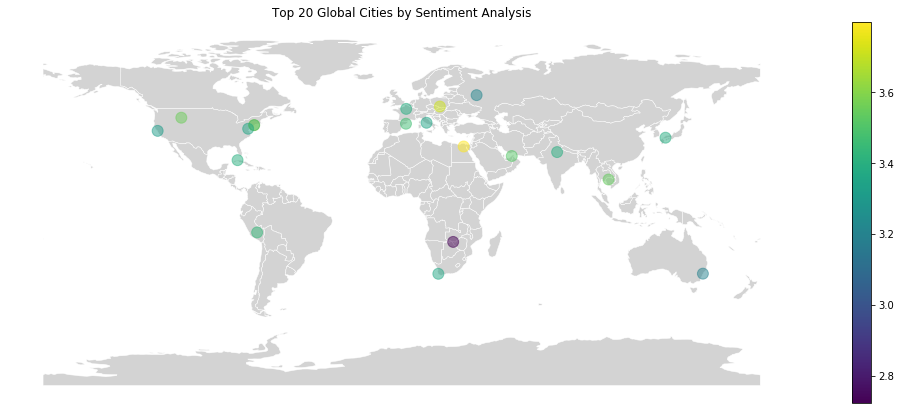

None
Hello there!!
Curious to learn about how places evoke emotion? 
 We have captured every single Emoti(c)on for you, in some of the world's most famous places!

=======================================================<>=====================================================


KeyboardInterrupt: 

In [85]:
      
main()